In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import re
from textwrap import wrap
import matplotlib.ticker
import os
import seaborn as sns
sns.color_palette("bright", 8)
sns.set_palette("bright")
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
def append_vars(ds, cols):
    v=ds[cols]
    X=ds.drop(columns=cols)
    return pd.concat([X.assign(cfu=ds[col], name=ds['year'].apply(lambda y: f"{col} {y}")) for col in cols]).dropna()

In [3]:
def save_plot(fname):
    plt.savefig(f"plots/{fname}.svg")
    plt.savefig(f"plots/{fname}.png")

In [4]:
import matplotlib.ticker as mtick

def make_dfs(df,fname):
    #colors = ['#00008b', '#1e90ff', '#40e0d0', 'g', 'y']
    fig, ax = plt.subplots(figsize=(12,8))
    #sns.set_palette(colors)
    ax=sns.swarmplot(x='week', y='cfu', hue='name', data=df,  alpha=0.8, size=12, linewidth=1, edgecolor='w')
    #ax=sns.scatterplot(x='week', y='cfu', hue='name', data=c,  alpha=0.8, size= 14, linewidth=1, edgecolor='w')
    plt.axvline(x=1.42, color='b', linestyle='-.', alpha=0.8)
    plt.axvline(x=3.7, color='b', linestyle='-.', alpha=0.8)
    ax.text(2.56, 1960,  "Jazz 2016", ha="center", va="center", size=14, color='b')
    ax.annotate("", xy=(1.42, 1900), xycoords='data',
               xytext=(3.7, 1900), textcoords='data',
               arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3", color='b', alpha=0.8))
    plt.axvline(x=2.4, color='r', linestyle='-.', alpha=0.8)
    plt.axvline(x=4.58, color='r', linestyle='-.', alpha=0.8)
    ax.text(3.4, 2240,  "Jazz 2017", ha="center", va="center", size=14, color='r')
    ax.annotate("", xy=(2.4, 2200), xycoords='data',
               xytext=(4.58, 2200), textcoords='data',
               arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3", color='r', alpha=0.8))
    ax.xaxis.grid(which="major", color='b', linewidth=0.7, alpha=0.1)
    ax.set_xlabel("Sample weeks 2016, 2017 and 2020", size=16, labelpad=20)
    ax.set_ylabel("Colony forming units per 100mL", size=16, labelpad=20)
    plt.suptitle("Montreux large events and the occurrence of bacteria in lake water" , fontsize=16, family='sans')
    plt.title("Colonies grouped by year and week number", fontsize=16, family='sans', y=1.03)
    ax.legend(loc='upper right', fontsize=14)
    save_plot(fname)

In [5]:
A=pd.read_pickle("data/allyears-avg_plate.pkl")
A['Date_dt'] = pd.to_datetime(A['Date'])
R=pd.read_csv('data/rain_all.csv')
A2=append_vars(A,['Bioindicator', 'Bioindicator UV+', 'Coliform'])

## Year over year 2016 2017 and 2020

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/cat

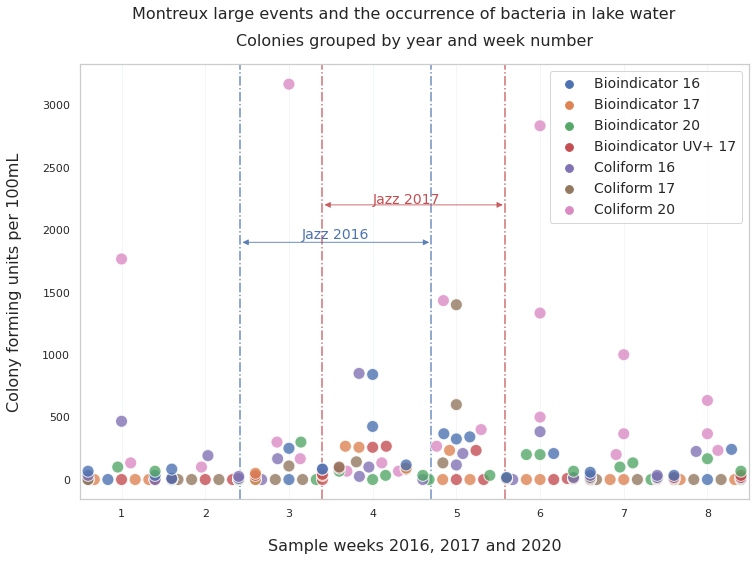

In [6]:
make_dfs(A2,'YEAR_OVER_YEAR_CFUINCREASE_JAZZ_2016_2017_2020')

## Year over year 2016 2017 

In [24]:
def make_dfs_2016_2017(df,fname):
    #colors = ['#00008b', '#1e90ff', '#40e0d0', 'g', 'y']
    fig, ax = plt.subplots(figsize=(12,8))
    #sns.set_palette(colors)
    ax=sns.swarmplot(x='week', y='cfu', hue='name', data=df,  alpha=0.8, size=12, linewidth=1, edgecolor='w')
    #ax=sns.scatterplot(x='week', y='cfu', hue='name', data=c,  alpha=0.8, size= 14, linewidth=1, edgecolor='w')
    plt.axvline(x=1.42, color='b', linestyle='-.', alpha=0.8)
    plt.axvline(x=3.7, color='b', linestyle='-.', alpha=0.8)
    ax.text(2.56, 600,  "Jazz 2016", ha="center", va="center", size=14, color='b')
    ax.annotate("", xy=(1.42, 580), xycoords='data',
               xytext=(3.7, 580), textcoords='data',
               arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3", color='b', alpha=0.8))
    plt.axvline(x=2.4, color='r', linestyle='-.', alpha=0.8)
    plt.axvline(x=4.58, color='r', linestyle='-.', alpha=0.8)
    ax.text(3.4, 800,  "Jazz 2017", ha="center", va="center", size=14, color='r')
    ax.annotate("", xy=(2.4, 780), xycoords='data',
               xytext=(4.58, 780), textcoords='data',
               arrowprops=dict(arrowstyle="<|-|>", connectionstyle="arc3", color='r', alpha=0.8))
    ax.xaxis.grid(which="major", color='b', linewidth=0.7, alpha=0.1)
    ax.set_xlabel("Sample weeks 2016, 2017", size=16, labelpad=20)
    ax.set_ylabel("Colony forming units per 100mL", size=16, labelpad=20)
    plt.suptitle("Montreux large events and the occurrence of bacteria in lake water" , fontsize=16, family='sans')
    plt.title("Colonies grouped by year and week number", fontsize=16, family='sans', y=1.03)
    ax.legend(loc='upper right', fontsize=14)
    save_plot(fname)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 53.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


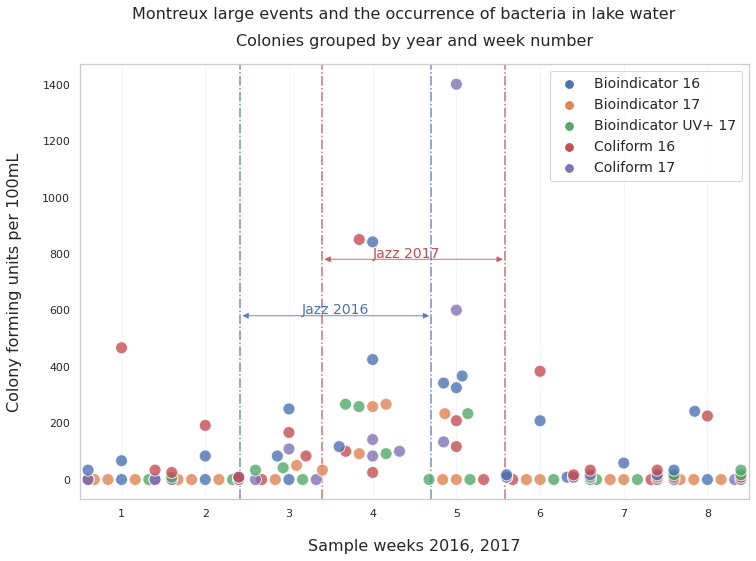

In [25]:
make_dfs_2016_2017(A2.query('year != 20'),'YEAR_OVER_YEAR_CFUINCREASE_JAZZ_2016_2017')

## Rain plots

In [8]:
def plot_with_rain(df,col_name, rain, sup_title, title, filename):
    mindate=df['Date'].min()
    R=rain.query(f"Date>'{mindate}'")
    collss=['darkred', 'darkslategray', 'teal']
    fig, ax2 = plt.subplots(figsize=(10,6), edgecolor='midnightblue')    
    ylim = [1]
    for i, n in enumerate(df['Location'].unique()):
        yn=df.query(f"Location=='{n}'")
        maxn = yn[col_name].max()
        ratio = yn[col_name].std()/maxn
        for index, row in yn.iterrows():
            t, c, j = ax2.errorbar(row['Date_dt'], row[col_name], yerr=row[col_name]*ratio, capsize=2, alpha=0.4, ecolor='magenta',)
            for k in j:
                k.set_linestyle('--')
            for cap in c:
                cap.set_marker("o")
        ax2.plot(yn['Date_dt'], yn[col_name], label=n, color=collss[i], linewidth=3)
        if maxn > max(ylim):
            ylim.append(maxn)
        ax2.set_ylim(bottom=0, top=max(ylim)+100)

    ax1 = ax2.twinx() 
    ax1.bar(pd.to_datetime(R['Date']).values, R['Rain'].values, color='lightskyblue', width=0.99, alpha=0.4, label="mm of rain")
      
    for pos in ['bottom', 'top', 'left', 'right']:
        ax1.spines[pos].set_color('midnightblue')
    ax1.grid(which='major', color='midnightblue', linestyle='--', alpha=0.2, axis='y')
    ax1.tick_params(axis='both', which='both', color='midnightblue')
    ax1.set_ylabel('Millimeters of rain per day', labelpad=10, fontsize=14)
    
    ax2.set_ylabel('Colony forming units per 100mL', labelpad=10, fontsize=14)
    fig.legend( loc=(0.74, 0.55), frameon=True, fontsize=12, edgecolor='midnightblue', framealpha=0.8 )
    
    plt.xticks(df['Date'].unique(), [f"Week {i+1}" for i in range(8)], fontsize=11 )
    plt.suptitle(sup_title, fontsize=16, family='sans')
    plt.title(title, fontsize=16, family='sans', y=1.03)
    plt.subplots_adjust(top=0.85)
    save_plot(filename)
    plt.show()

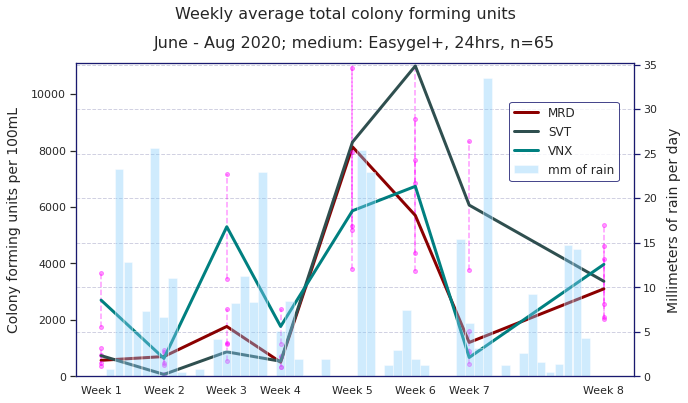

In [9]:
plot_with_rain(A.query('year == 20'),'total',R.query('year == 20'),
               'Weekly average total colony forming units',
               'June - Aug 2020; medium: Easygel+, 24hrs, n=65',
               '2020_AVG_Total_CFU_week')

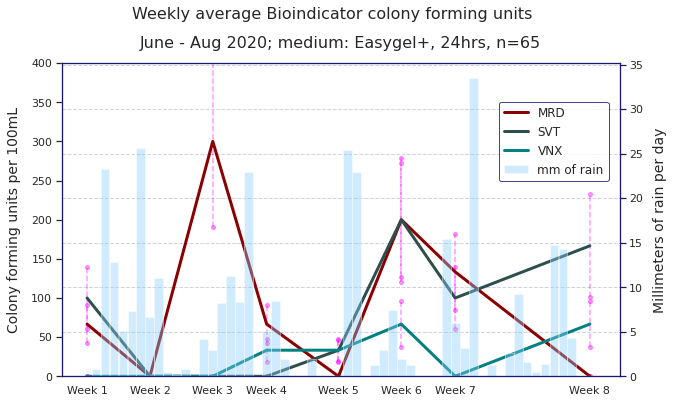

In [10]:
plot_with_rain(A.query('year == 20'),'Bioindicator',R.query('year == 20'),
                'Weekly average Bioindicator colony forming units',
               'June - Aug 2020; medium: Easygel+, 24hrs, n=65',
                '2020_AVG_Bioindicator_CFU_week')

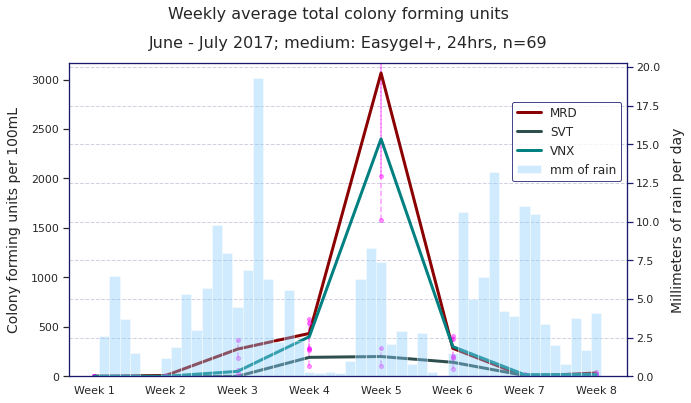

In [11]:
plot_with_rain(A.query('year == 17'),'total',R.query('year == 17'),  
               'Weekly average total colony forming units', 
               'June - July 2017; medium: Easygel+, 24hrs, n=69', 
               '2017_AVG_Total_CFU_week')

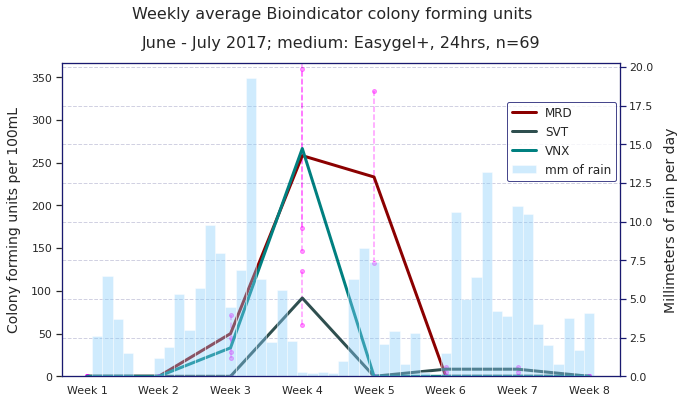

In [12]:
plot_with_rain(A.query('year == 17'),'Bioindicator',R.query('year == 17'), 
               'Weekly average Bioindicator colony forming units',
               'June - July 2017; medium: Easygel+, 24hrs, n=69',
               '2017_AVG_BigBlue_CFU_week')

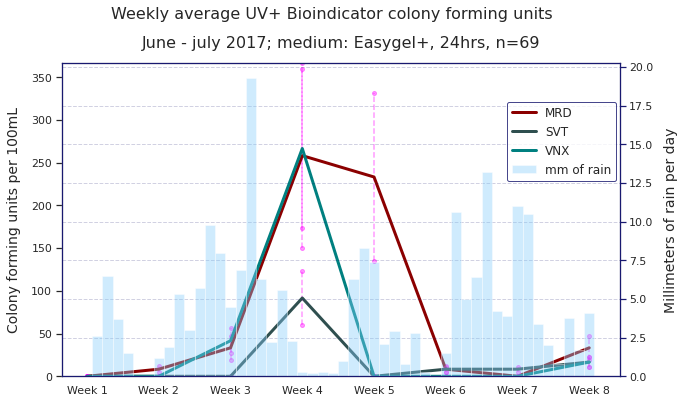

In [13]:
plot_with_rain(A.query('year == 17'),'Bioindicator UV+',R.query('year == 17'),
               'Weekly average UV+ Bioindicator colony forming units',
               'June - july 2017; medium: Easygel+, 24hrs, n=69',
               '2017_AVG_UltraViolet_CFU_week')

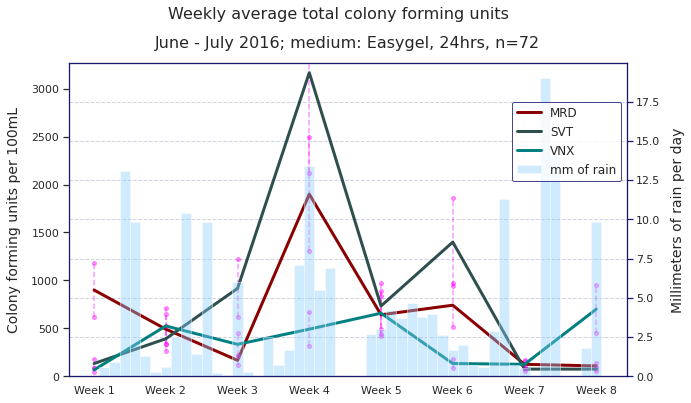

In [14]:
plot_with_rain(A.query('year == 16'),'total',R.query('year == 16'),
               'Weekly average total colony forming units', 
                'June - July 2016; medium: Easygel, 24hrs, n=72', 
                '2016_AVG_Total_CFU_week_16')

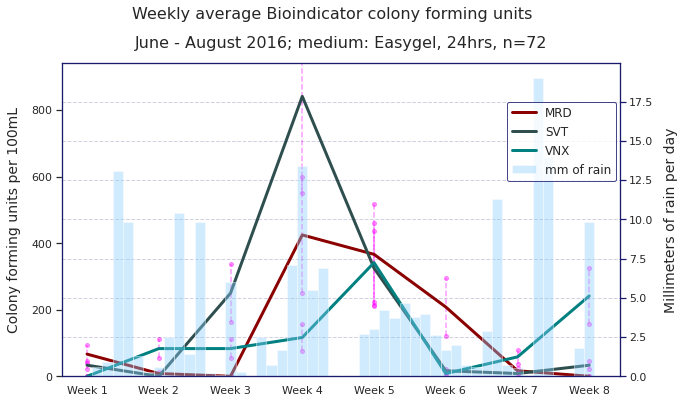

In [15]:
plot_with_rain(A.query('year == 16'),'Bioindicator',R.query('year == 16'),
               'Weekly average Bioindicator colony forming units',
                'June - August 2016; medium: Easygel, 24hrs, n=72',
                '2016_AVG_BigBlue_CFU_week')